## Linear Regression

Linear regression is one of the oldest and arguably the simplest kind of regression model in stats. While its strong assumption about linearity of data limits its direct applications, it is still the backbone of many modern regression models that are capable of fitting non-linear models. Thus, linear regression is quintessential to statistical modelling.

Linear regression fits data by minimizing the MSE of Mean Squared Error function.

$$\text{MSE} = \sum_{i = 1}^{N}(y_i - x_i^{T} \beta)$$

Here $N$ is the total number of observations in the training dataset, $y_i$ is the response value given $x_i$. Keep in mind that $x_i$ is a $p \times 2$-dimensional matrix with the first column being all $1$ and the next column being the features $[1 \ x_{i1} \ x_{i2} \ ... \ x_{ip}]^{T}$. You may note the $1$ at the beginning of the feature vector. That is used for compressing the otherwise descriptive expression with two model parameters $\beta_0$ (the bias/intercept) and $\beta_1$ (the slope) (for a one-dimensional feature vector). The $\beta$ vector is thus simply $[\beta_0 \ \beta_1 \ ... \ \beta_p]$. Notice that there is a slope term for each dimension of the $x_i$ feature vector. Linear regression is often seen as a projection of the response variables $y_i$ from a $p$-dimensional plane to a $(p-1)$-dimensional plane (a hyperplane).

One of the key assumptions of linear regression is that the residuals or error terms ($e_i = y_i - x_i^{T} \beta$) follow a standard normal distribution with constant variance across all points and are independent from each other.

### Experimental setup

Our base line will be $y = 2x + 1$ with our data points being distributed with a standard normal error terms around the line.

In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

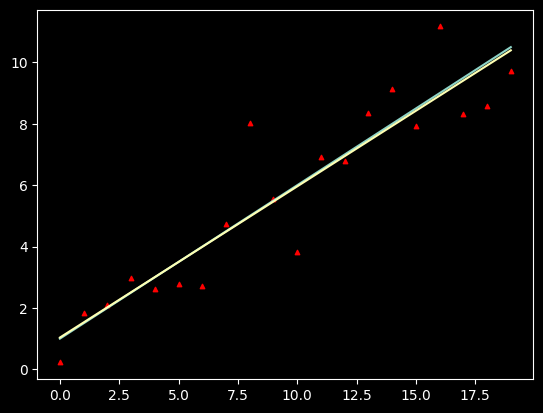

[[0.49262339]]
[1.03550545]


In [33]:
def fn(x):
    return 0.5 * x + 1


xs = np.arange(20)
plt.plot(xs, fn(xs))
ys = fn(xs) + np.random.standard_normal(xs.shape)
plt.scatter(xs, ys, marker="^", s=10, c="red")
lr = LinearRegression()
lr.fit(X=xs.reshape(-1, 1), y=ys.reshape(-1, 1))
plt.plot(xs, lr.predict(xs.reshape(-1, 1)))
plt.show()

print(lr.coef_)
print(lr.intercept_)

### What if the error distribution assumption is violated?

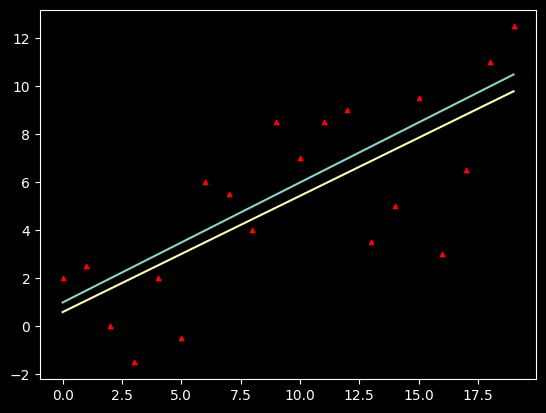

[[0.48421053]]
[0.6]


In [49]:
xs = np.arange(20)
plt.plot(xs, fn(xs))
ys = fn(xs) + np.random.choice([-1, 1], size=xs.shape) * np.random.poisson(
    lam=2, size=xs.shape
)
plt.scatter(xs, ys, marker="^", s=10, c="red")
lr = LinearRegression()
lr.fit(X=xs.reshape(-1, 1), y=ys.reshape(-1, 1))
plt.plot(xs, lr.predict(xs.reshape(-1, 1)))
plt.show()

print(lr.coef_)
print(lr.intercept_)
